In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ALLCools.plot import *
from ALLCools.dmr.dmr_lineage_plot import *

## rc

In [2]:
from matplotlib import rc

labelsize = 8
linewidth = 0.6
rc('lines', linewidth=linewidth)
rc('axes', labelsize=labelsize, linewidth=linewidth)
rc('xtick', labelsize=labelsize)
rc('ytick', labelsize=labelsize)
rc('xtick.major', width=linewidth)
rc('ytick.major', width=linewidth)
rc('xtick.minor', width=linewidth-0.2)
rc('ytick.minor', width=linewidth-0.2)

## Cluster Summary

In [3]:
cell_tidy_data = pd.read_msgpack(
    '/home/hanliu/project/mouse_rostral_brain/study/ClusteringSummary/Summary/TotalClusteringResults.msg'
)

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The read_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
cell_tidy_data.columns

Index(['AllcPath', 'CCC_Rate', 'CG_Rate', 'CG_RateAdj', 'CH_Rate',
       'CH_RateAdj', 'FinalReads', 'InputReads', 'MappedReads', 'Region',
       'index_name', 'uid', 'BamFilteringRate', 'MappingRate', 'Pos96',
       'Plate', 'Col96', 'Row96', 'Col384', 'Row384', 'FACS_Date', 'Slice',
       'CellClass', 'l1-umap_0', 'l1-umap_1', 'l1-tsne_0', 'l1-tsne_1',
       'MajorType', 'l2-umap_0', 'l2-umap_1', 'l2-tsne_0', 'l2-tsne_1',
       'SubType', 'l3-umap_0', 'l3-umap_1', 'l3-tsne_0', 'l3-tsne_1',
       'L1CellClass', 'class_tsne_0', 'class_tsne_1', 'class_umap_0',
       'class_umap_1', 'Order', 'RegionName', 'MajorRegion', 'SubRegion',
       'DetailRegion', 'PotentialOverlap (MMB)', 'Anterior (CCF coords)',
       'Posterior (CCF coords)', 'MajorRegionColor', 'SubRegionColor',
       'DissectionRegionColor', 'Replicate'],
      dtype='object')

In [5]:
cell_tidy_data.head()

,AllcPath,CCC_Rate,CG_Rate,CG_RateAdj,CH_Rate,CH_RateAdj,FinalReads,InputReads,MappedReads,Region,...,MajorRegion,SubRegion,DetailRegion,PotentialOverlap (MMB),Anterior (CCF coords),Posterior (CCF coords),MajorRegionColor,SubRegionColor,DissectionRegionColor,Replicate
10E_M_0,/gale/raidix/rdx-4/mapping/10E/CEMBA190625-10E...,0.008198,0.822633,0.821166,0.041640,0.033718,1626504.0,4407752,2892347.0,10E,...,HPF,CA1-3,"CA1, CA2, CA3, SUB, ProS","PA, HATA",7500,8100,#d62728,#d62728,#FF6347,10E-190625
10E_M_1,/gale/raidix/rdx-4/mapping/10E/CEMBA190625-10E...,0.006019,0.743035,0.741479,0.024127,0.018218,2009998.0,5524084,3657352.0,10E,...,HPF,CA1-3,"CA1, CA2, CA3, SUB, ProS","PA, HATA",7500,8100,#d62728,#d62728,#FF6347,10E-190625
10E_M_10,/gale/raidix/rdx-4/mapping/10E/CEMBA190625-10E...,0.006569,0.750172,0.748520,0.027665,0.021235,1383636.0,3455260,2172987.0,10E,...,HPF,CA1-3,"CA1, CA2, CA3, SUB, ProS","PA, HATA",7500,8100,#d62728,#d62728,#FF6347,10E-190625
10E_M_101,/gale/raidix/rdx-4/mapping/10E/CEMBA190625-10E...,0.006353,0.760898,0.759369,0.026547,0.020323,2474670.0,7245482,4778768.0,10E,...,HPF,CA1-3,"CA1, CA2, CA3, SUB, ProS","PA, HATA",7500,8100,#d62728,#d62728,#FF6347,10E-190625
10E_M_102,/gale/raidix/rdx-4/mapping/10E/CEMBA190625-10E...,0.005409,0.752980,0.751637,0.019497,0.014164,2430290.0,7004754,4609570.0,10E,...,HPF,CA1-3,"CA1, CA2, CA3, SUB, ProS","PA, HATA",7500,8100,#d62728,#d62728,#FF6347,10E-190625


## Palette

In [6]:
region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/dissection_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
sub_region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/sub_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
major_region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/major_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()

cell_class_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/cell_class.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
major_type_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/major_type.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
sub_type_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/sub_type.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()

In [7]:
region_order = [
    'MOB', 'AON', 'PIR-1', 'PIR-2', 'PIR-3', 'PIR-4', 'PIR-5', 'ORB', 'PFC-1',
    'PFC-2', 'ACA-1', 'ACA-2', 'ACA-3', 'AI', 'MOp-1', 'MOp-2', 'MOp-3',
    'MOp-4', 'MOs-1', 'MOs-2', 'MOs-3', 'SSp-1', 'SSp-2', 'SSp-3', 'SSp-4',
    'SSp-5', 'SSs-1', 'SSs-2', 'CA-i', 'CA-ii', 'CA-iii', 'CA-iv', 'DG-1',
    'DG-2', 'DG-3', 'DG-4', 'CP-1', 'CP-2', 'ACB-1', 'ACB-2', 'ACB-3', 'LSX-1',
    'LSX-2', 'PAL-1', 'PAL-2'
]

## Brain Region Bar

In [8]:
brain_region_df = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/BrainRegion.txt',
                              sep='\t', index_col=0)
brain_region_df = brain_region_df.set_index('RegionName').reindex(region_order).reset_index()

In [9]:
brain_region_df['SubRegion'].values

array(['MOB', 'AON', 'PIR', 'PIR', 'PIR', 'PIR', 'PIR', 'ORB', 'PFC',
       'PFC', 'ACA', 'ACA', 'ACA', 'AI', 'MOp', 'MOp', 'MOp', 'MOp',
       'MOs', 'MOs', 'MOs', 'SSp', 'SSp', 'SSp', 'SSp', 'SSp', 'SSs',
       'SSs', 'CA1-3', 'CA1-3', 'CA1-3', 'CA1-3', 'DG', 'DG', 'DG', 'DG',
       'CP', 'CP', 'ACB', 'ACB', 'ACB', 'LSX', 'LSX', 'PAL', 'PAL'],
      dtype=object)

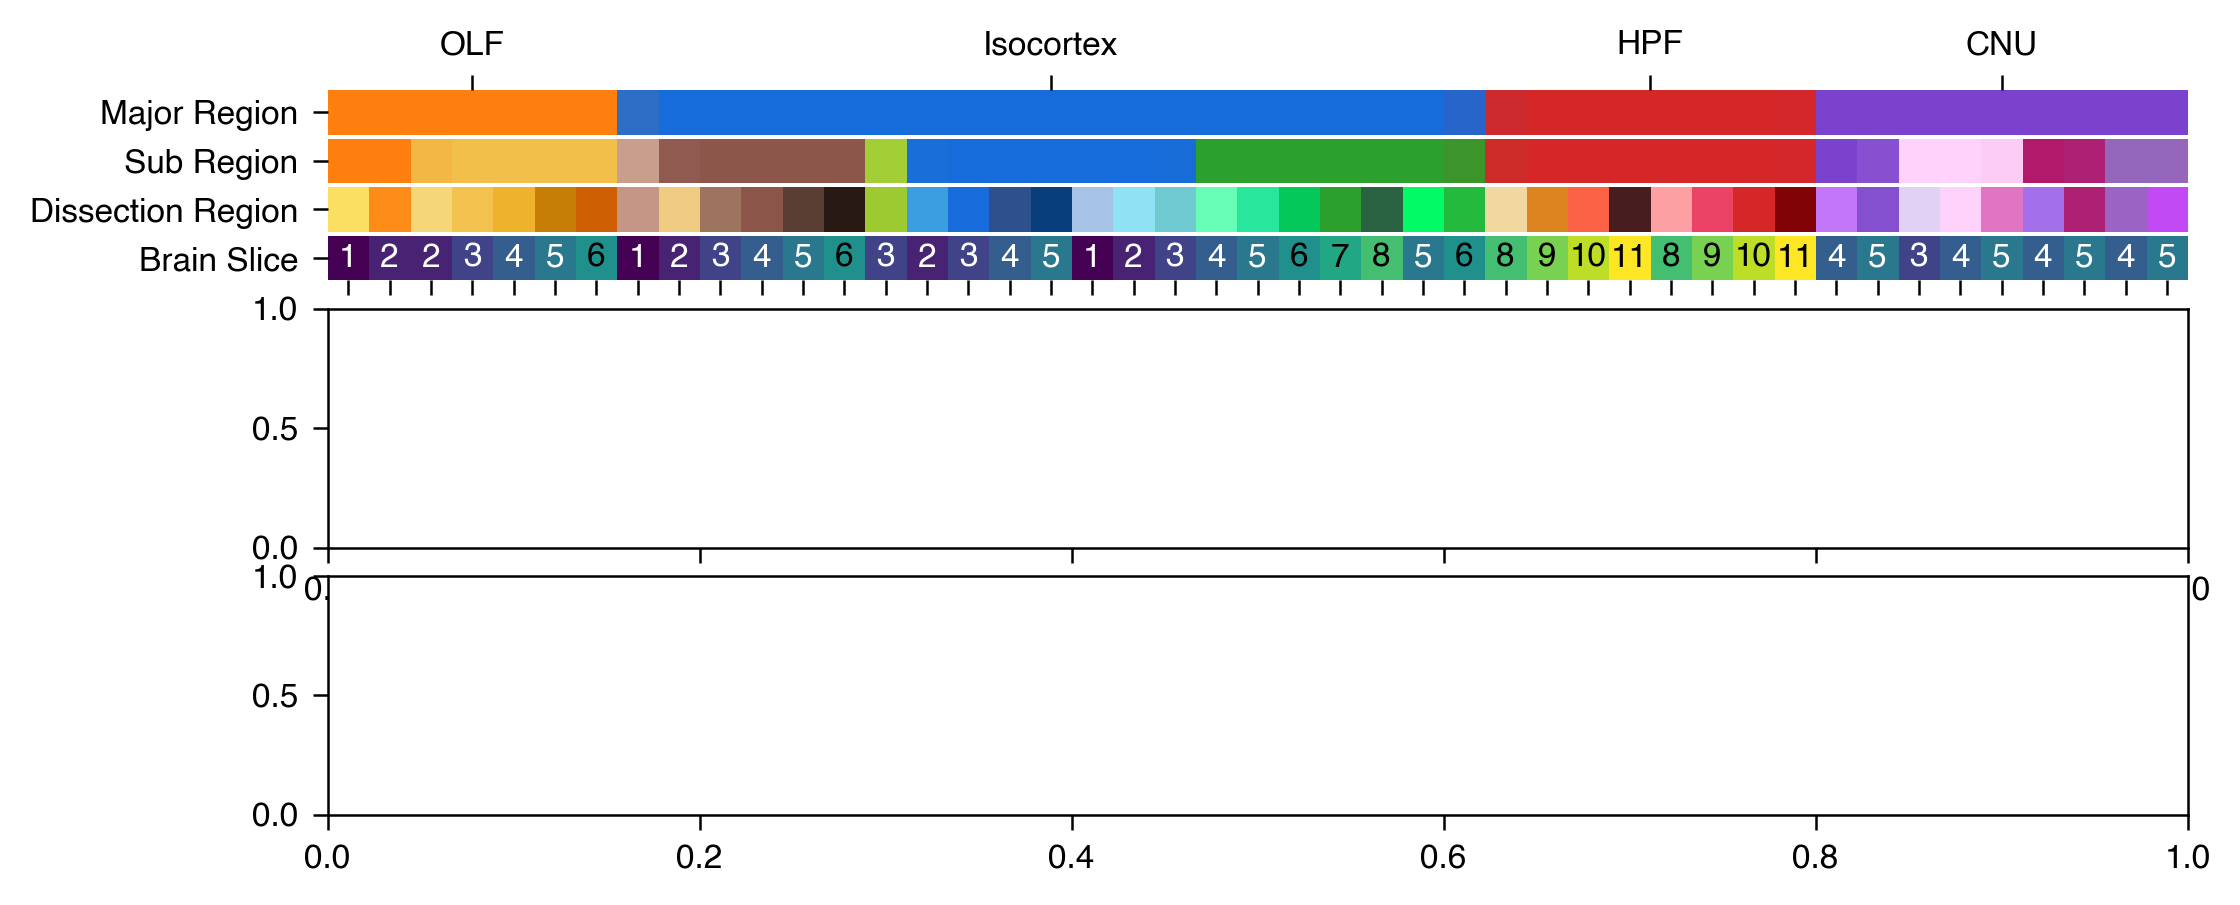

In [10]:
from matplotlib.colors import LinearSegmentedColormap

fig = plt.figure(figsize=(8, 3.2), dpi=300)
gs = fig.add_gridspec(30, 1)

axes = [fig.add_subplot(gs[:2, 0]), 
        fig.add_subplot(gs[2:4, 0]), 
        fig.add_subplot(gs[4:6, 0]), 
        fig.add_subplot(gs[6:8, 0])]
ax_portion = fig.add_subplot(gs[9:19, 0])
ax_n50 = fig.add_subplot(gs[20:30, 0])


major_region_data = []
major_region_color = []
sub_region_data = []
sub_region_color = []
region_data = []
region_color = []

for i, row in brain_region_df.iterrows():
    major_region_data.append(i)
    sub_region_data.append(i)
    region_data.append(i)

    major_region_color.append(major_region_palette[row['MajorRegion']])
    sub_region_color.append(sub_region_palette[row['SubRegion']])
    region_color.append(region_palette[row['DissectionRegion']])

_major_region_palette = LinearSegmentedColormap.from_list(
    '', major_region_color)
_sub_region_palette = LinearSegmentedColormap.from_list('', sub_region_color)
_region_palette = LinearSegmentedColormap.from_list('', region_color)

legends = [(major_region_data, _major_region_palette),
           (sub_region_data, _sub_region_palette),
           (region_data, _region_palette)]

for (_data, _palette), ax in zip(legends, axes):
    ax.imshow(np.array(_data).reshape(1, len(_data)),
              cmap=_palette,
              aspect='auto',
              interpolation=None)
    
ax = axes[0]
ax.xaxis.set_ticks_position('top')
ax.set(yticks=[0], yticklabels=['Major Region'])
ax.set(xticks=[3, 17, 31.5, 40], xticklabels=['OLF', 'Isocortex', 'HPF', 'CNU'])

ax = axes[1]
ax.set(yticks=[0], yticklabels=['Sub Region'])
ax.set(xticks=[])
ax = axes[2]
ax.set(yticks=[0], yticklabels=['Dissection Region'])
ax.set(xticks=[])

ax = axes[3]
ax.set(yticks=[0], yticklabels=['Brain Slice'],
       xticks=range(len(region_order)), xticklabels=[])
ax.xaxis.set_tick_params(rotation=90)

ax.imshow(brain_region_df['Slice'].values.reshape(1, len(_data)),
          cmap='viridis',
          aspect='auto',
          interpolation=None)
for i, _slice in enumerate(brain_region_df['Slice'].values):
    if _slice < 6:
        c = 'w'
    else:
        c = 'k'
    ax.text(i, 0, _slice, fontsize=labelsize, ha='center', va='center', c=c)

for ax in axes:
    sns.despine(ax=ax, left=True, bottom=True)

## Calculate Cell Type Region Portion

In [11]:
x = 'Region'
hue = 'MajorType'

hue_order = [
    'IT-L23', 'IT-L4', 'IT-L5', 'IT-L6', 'PT-L5', 'CT-L6', 'NP-L6', 'L6b',
    'EP', 'CLA', 'OLF-Exc', 'Gfra1', 'IG-CA2', 'DG-po', 'CA3', 'CA3-St18',
    'CA1', 'MGE-Pvalb', 'MGE-Sst', 'CGE-Vip', 'CGE-Lamp5', 'Unc5c', 'Chd7',
    'LSX-Inh', 'PAL-Inh', 'Foxp2', 'MSN-D1', 'MSN-D2', 'D1L-Fstl4', 'D1L-PAL',
    'DG', 'ANP', 'OLF', 'ASC', 'ODC', 'OPC', 'MGC', 'PC', 'EC', 'VLMC',
    'VLMC-Pia'
]

hue_palette = major_type_palette
x_palette = region_palette

# get data
counts = cell_tidy_data[[x, hue
                         ]].groupby(x)[hue].value_counts()
type_by_region_count = counts.unstack().fillna(0).astype(int)
type_by_region_count = type_by_region_count[hue_order].copy()

type_by_region_ratio = type_by_region_count.divide(
    type_by_region_count.sum(axis=1), axis=0)
type_by_region_ratio_cumsum = np.cumsum(type_by_region_ratio, axis=1)

bar_data = type_by_region_ratio_cumsum.stack().reset_index()
bar_data.columns = [x, hue, 'value']

In [12]:
region_name_map = brain_region_df.set_index('RegionName')['DissectionRegion'].to_dict()
region_id_order = [region_name_map[i] for i in region_order]

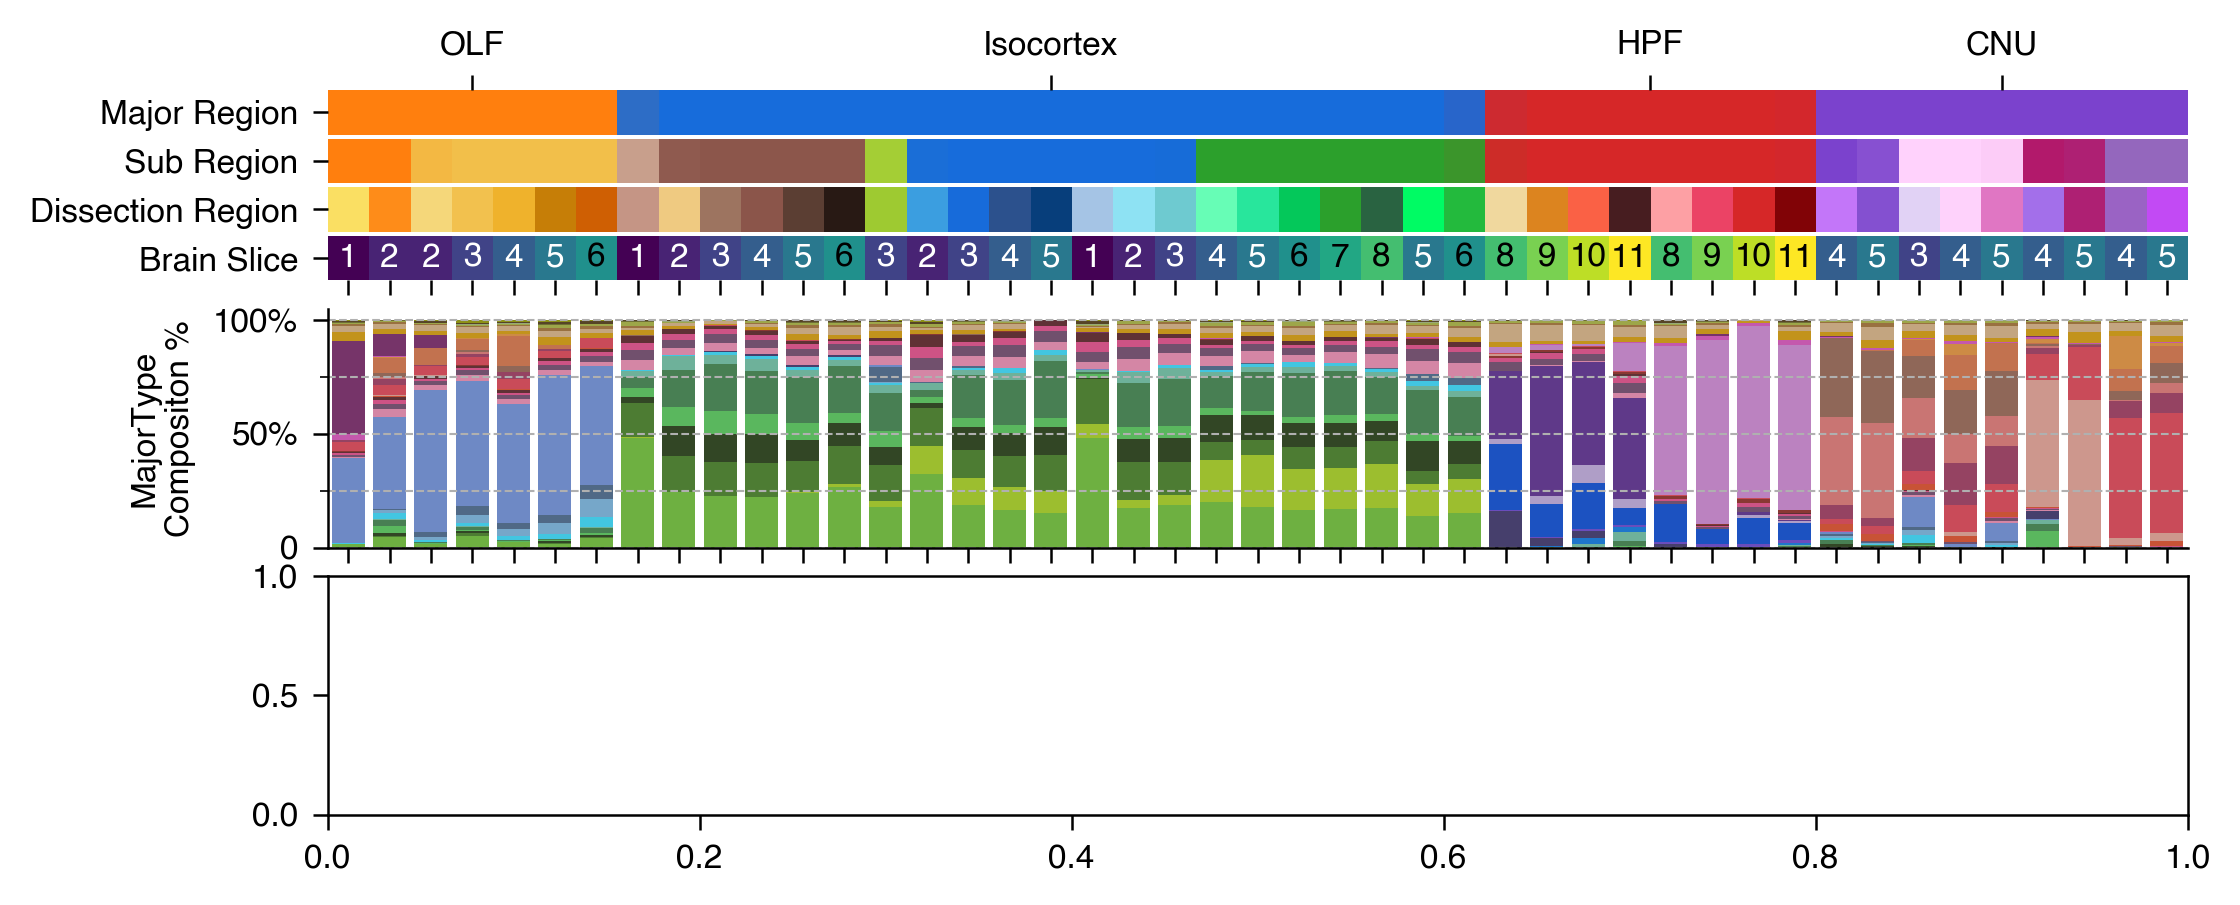

In [13]:
sns.barplot(ax=ax_portion, data=bar_data, 
            x=x, y='value', order=region_id_order,
            hue=hue, dodge=False, palette=hue_palette, 
            hue_order=type_by_region_ratio_cumsum.columns[::-1])

ax_portion.set(xticklabels=[], ylabel='MajorType\nCompositon %', xlabel='')
ax_portion.yaxis.set_ticks([0, 0.5, 1])
ax_portion.yaxis.set_ticklabels(['0', '50%', '100%'])
ax_portion.yaxis.set_ticks([0.25, 0.75], minor=True)
ax_portion.grid(axis='y', which='both', 
        linestyle='--', linewidth=0.5)
sns.despine(ax=ax_portion)
ax_portion.legend(bbox_to_anchor=(1.2, 1), ncol=9, fontsize=labelsize)
ax_portion.legend_.set_visible(False)
fig

## Calculate Entropy

In [14]:
from scipy.stats import entropy

def n50_ratio(cagetorical_label, ratio=True):
    n = cagetorical_label.size
    counts = cagetorical_label.value_counts()
    n50 = counts[counts.cumsum() > (n * 0.5)][0]
    n50_rate = n50 / n
    if ratio:
        return n50_rate
    else:
        return n50

x = 'Region'
region_col = ['SubType', 'MajorType', 'CellClass']

bar_data = {}
for col in region_col:
    region_type_entropy = cell_tidy_data.groupby(x)[col].apply(n50_ratio)
    bar_data[col] = region_type_entropy
bar_data = pd.DataFrame(bar_data)
bar_data = bar_data.unstack().reset_index()
bar_data.columns = ['ClusterLevel', 'Cluster', 'Entropy']

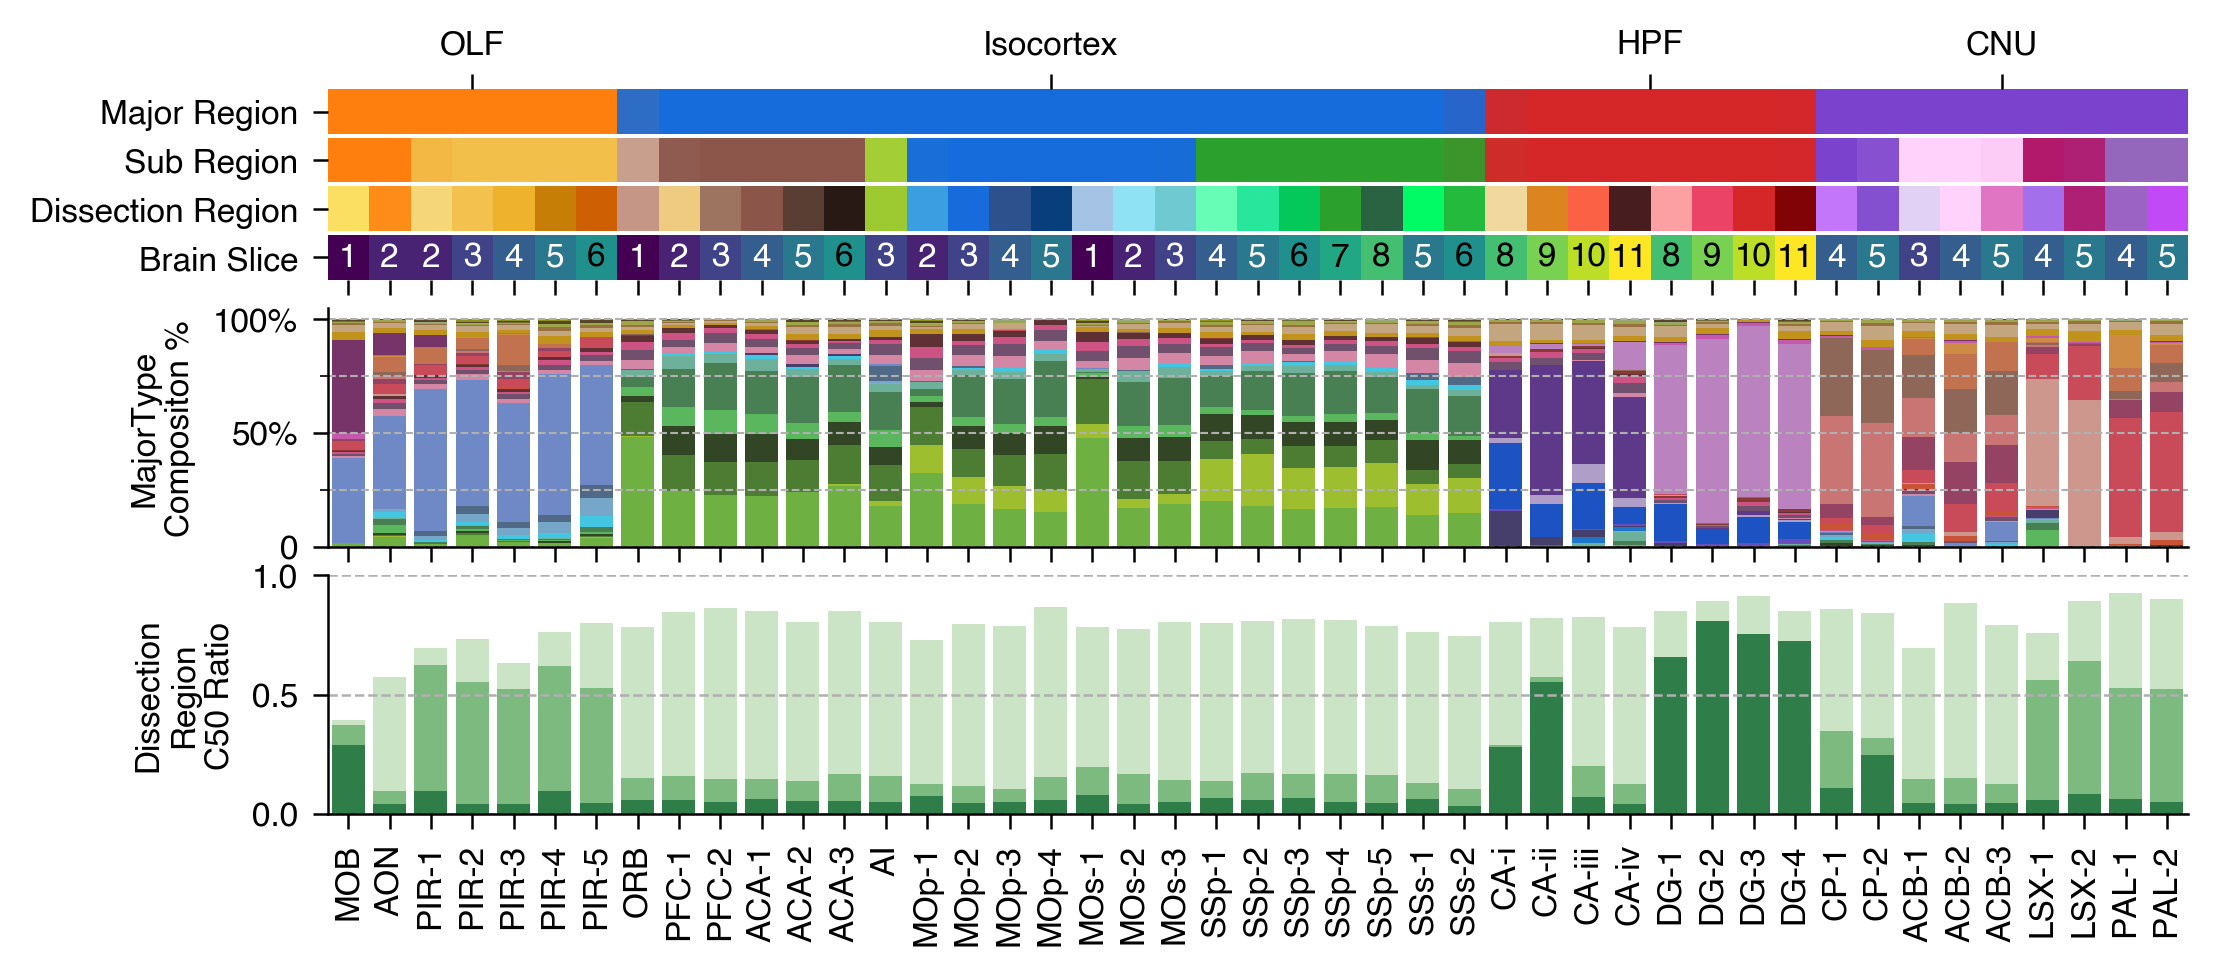

In [15]:
sns.barplot(data=bar_data,
            ax=ax_n50,
            x='Cluster',
            y='Entropy',
            order=region_id_order,
            hue='ClusterLevel',
            hue_order=region_col[::-1],
            palette='Greens',
            dodge=False)

ax_n50.set(xticklabels=region_order, 
           yticks=[0, 0.5, 1], 
           xlabel='', ylabel='Dissection\nRegion\nC50 Ratio')
ax_n50.xaxis.set_tick_params(rotation=90)
ax_n50.grid(axis='y', linewidth=linewidth, linestyle='--')
ax_n50.legend(bbox_to_anchor=(1.2, 1), ncol=3, fontsize=labelsize)
sns.despine(ax=ax_n50)
ax_n50.legend_.set_visible(False)
fig

## Finalize Figure

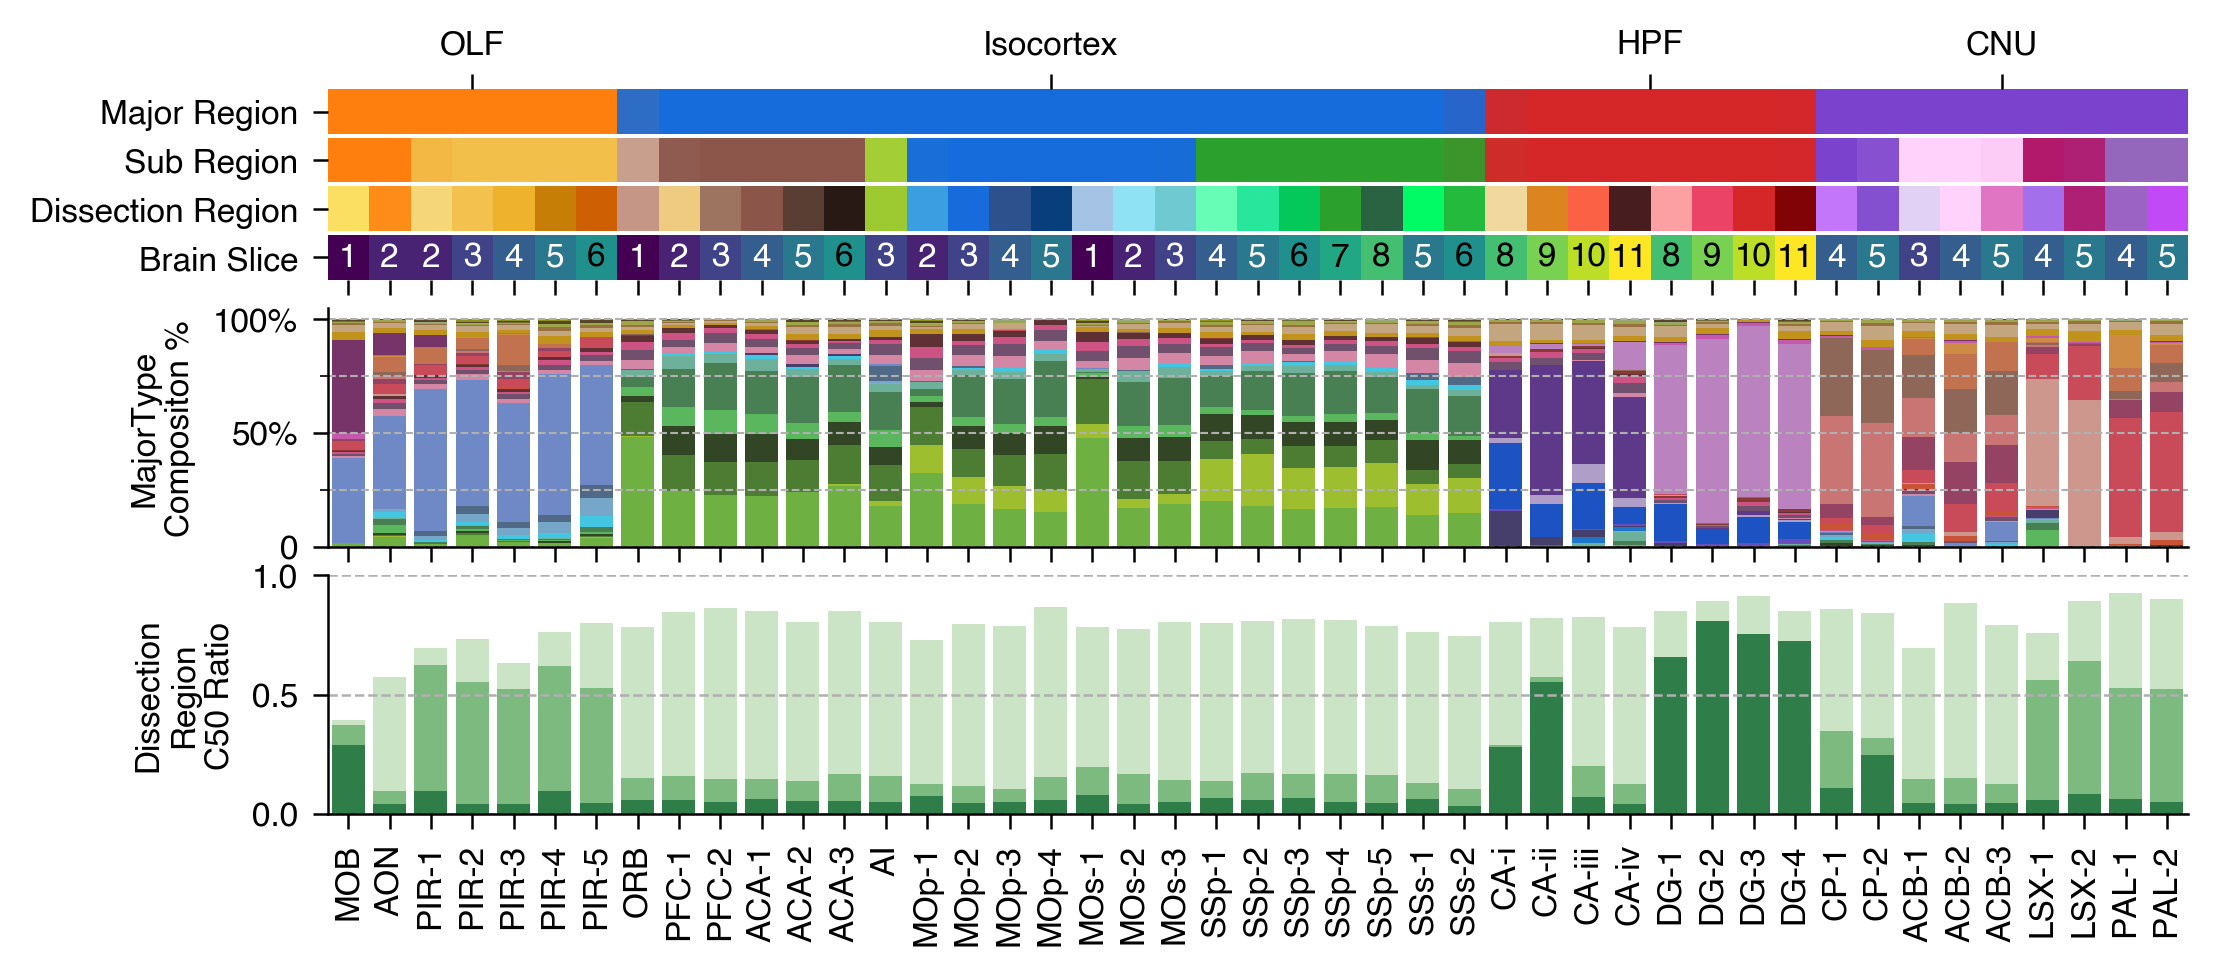

In [16]:
fig.savefig('region_major_type_bar_compound.pdf', bbox_inches='tight')
fig